# Pendulum

The state and control vectors $\textbf{x}$ and $\textbf{u}$ are defined as follows:

$$
\begin{equation*}
\textbf{x} = \begin{bmatrix}
    \theta & \dot{\theta}
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\textbf{u} = \begin{bmatrix}
    \tau
    \end{bmatrix}
\end{equation*}
$$

The goal is to swing the pendulum upright:
$$
\begin{equation*}
\textbf{x}_{goal} = \begin{bmatrix}
    0 & 0
    \end{bmatrix}
\end{equation*}
$$

**Note**: The force is constrained between $-1$ and $1$ Nm.

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pddp
import pddp.examples

In [5]:
import torch
import numpy as np

In [6]:
DT = 0.1  # Time step (s).
N = 40  # Horizon length.
RENDER = True  # Whether to render the environment or not.

# Disable uncertainty since we are dealing with known dynamics.
ENCODING = pddp.StateEncoding.IGNORE_UNCERTAINTY

In [7]:
cost = pddp.examples.pendulum.PendulumCost()
model = pddp.examples.pendulum.PendulumDynamicsModel(DT)
env = pddp.examples.pendulum.PendulumEnv(dt=DT, render=RENDER)

In [8]:
def plot(Z, U):
    t = np.arange(N + 1) * DT
    X = pddp.utils.encoding.decode_mean(Z, ENCODING).detach().numpy()
    U = model.constrain(U).detach().numpy()

    theta = np.unwrap(X[:, 0])  # Makes for smoother plots.
    theta_dot = X[:, 1]
    
    plt.figure()
    plt.plot(theta, theta_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Orientation Phase Plot")

    plt.figure()
    plt.plot(t, theta)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Orientation path")

    plt.figure()
    plt.plot(t, theta_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Angular velocity path")
    
    plt.figure()
    plt.plot(t[:-1], U)
    plt.xlabel("Time (s)")
    plt.ylabel("Torque (N m)")
    plt.title("Constrained action path")
    
    plt.figure()
    plt.plot(J_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Total loss")
    plt.title("Loss path")

In [9]:
def on_iteration(iteration, Z, U, J_opt, accepted, converged):
    J_opt = J_opt.detach().numpy()

    J_hist.append(J_opt)
    info = "CONVERGED" if converged else ("accepted" if accepted else "FAILED")
    final_state = Z[-1].detach().numpy()
    final_state[0] = (final_state[0] + np.pi) % (2 * np.pi) - np.pi
    print("iteration", iteration + 1, info, J_opt, final_state)

In [10]:
controller = pddp.controllers.PDDPController(env, model, cost)

In [11]:
U = torch.randn(N, model.action_size, requires_grad=True)

In [12]:
J_hist = []
controller.eval()
Z, U = controller.fit(U, encoding=ENCODING, n_iterations=200, on_iteration=on_iteration)

iteration 1 accepted 18540.305 [  0.40329355 -11.961495  ]
iteration 2 accepted 17264.957 [ -1.027647 -12.38581 ]
iteration 3 accepted 13364.163 [ 2.0643852 10.076061 ]
iteration 4 accepted 7495.0547 [ 2.848146 -7.609168]
iteration 5 accepted 1605.7902 [-0.10444815  2.2923925 ]
iteration 6 accepted 695.1798 [-0.51019365  0.01929945]
iteration 7 accepted 468.12946 [-0.7459715 -1.6922784]
iteration 8 accepted 115.72061 [-0.26408702 -0.66938967]
iteration 9 accepted 38.574333 [-0.3159626 -0.2534661]
iteration 10 FAILED 38.574333 [-0.3159626 -0.2534661]
iteration 11 FAILED 38.574333 [-0.3159626 -0.2534661]
iteration 12 FAILED 38.574333 [-0.3159626 -0.2534661]
iteration 13 FAILED 38.574333 [-0.3159626 -0.2534661]
iteration 14 FAILED 38.574333 [-0.3159626 -0.2534661]
iteration 15 FAILED 38.574333 [-0.3159626 -0.2534661]
iteration 16 accepted 22.944523 [-0.27823907 -0.03641036]
iteration 17 FAILED 22.944523 [-0.27823907 -0.03641036]
iteration 18 FAILED 22.944523 [-0.27823907 -0.03641036]
iter

iteration 146 accepted 3.1053185 [-0.0257724   0.00126719]
iteration 147 accepted 3.0989618 [-0.02164919  0.00760186]
iteration 148 accepted 3.0964208 [-0.02650005  0.00091958]
iteration 149 accepted 3.0891511 [-0.02269394 -0.00520694]
iteration 150 FAILED 3.0891511 [-0.02269394 -0.00520694]
iteration 151 FAILED 3.0891511 [-0.02269394 -0.00520694]
iteration 152 FAILED 3.0891511 [-0.02269394 -0.00520694]
iteration 153 FAILED 3.0891511 [-0.02269394 -0.00520694]
iteration 154 FAILED 3.0891511 [-0.02269394 -0.00520694]
iteration 155 FAILED 3.0891511 [-0.02269394 -0.00520694]
iteration 156 accepted 3.0759788 [-0.02297575 -0.00350428]
iteration 157 accepted 3.0646896 [-0.02331859 -0.00156212]
iteration 158 accepted 3.053444 [-0.02389938  0.00038218]
iteration 159 accepted 3.0477824 [-0.02436048  0.00098348]
iteration 160 accepted 3.0431561 [-0.0266288   0.00183773]
iteration 161 accepted 3.0308814 [-0.02296192  0.00044739]
iteration 162 accepted 3.0308275 [-0.02297765  0.00035489]
iteration 

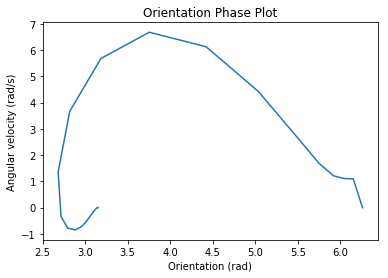

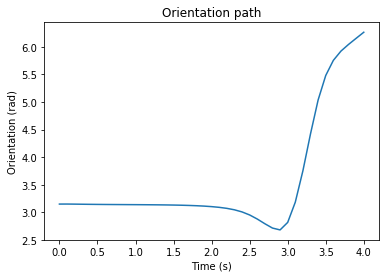

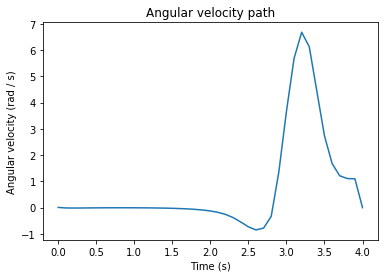

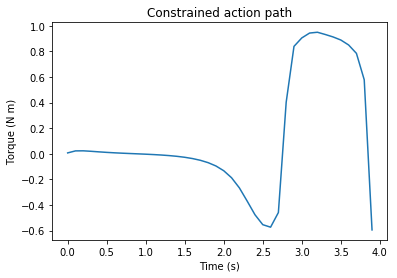

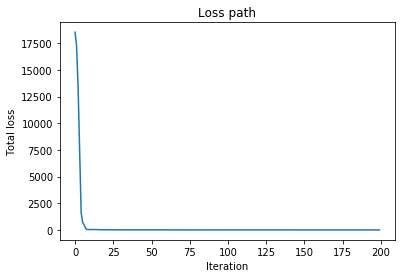

In [13]:
plot(Z, U)

In [14]:
if RENDER:
    # Wait for user interaction before visualizing. 
    _ = input("Press ENTER to continue")

Press ENTER to continue


In [15]:
import time

for i, u in enumerate(U):
    env.apply(u)
    time.sleep(DT)

In [16]:
env.close()